# 📊 Advanced Statistical Analysis

**Hypothesis Testing, Correlations & Statistical Insights**

This notebook performs comprehensive statistical analysis on the AQI dataset.

## Setup & Data Loading

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind, f_oneway, pearsonr, levene
import warnings
warnings.filterwarnings('ignore')

# Configuration
np.random.seed(42)
sns.set_style('darkgrid')

# Load data
df = pd.read_csv('final_dataset.csv')
POLLUTANTS = ['PM2.5', 'PM10', 'NO2', 'SO2', 'CO', 'Ozone']

# Feature engineering
df['DateTime'] = pd.to_datetime(df[['Year', 'Month', 'Date']].rename(
    columns={'Date': 'day', 'Month': 'month', 'Year': 'year'}
))

def get_season(month):
    if month in [12, 1, 2]: return 'Winter'
    elif month in [3, 4, 5]: return 'Summer'
    elif month in [6, 7, 8, 9]: return 'Monsoon'
    else: return 'Autumn'

df['Season'] = df['Month'].apply(get_season)
df['IsWeekend'] = df['Days'].isin([6, 7]).astype(int)
df['AvgPollution'] = df[POLLUTANTS].mean(axis=1)

print("✓ Data loaded and features created")

✓ Data loaded and features created


## 🔗 Correlation Analysis with P-Values

In [7]:
# Full correlation matrix
corr_matrix = df[POLLUTANTS + ['AQI']].corr()

print("="*60)
print("CORRELATION MATRIX")
print("="*60)
print(corr_matrix.round(3))

CORRELATION MATRIX
       PM2.5   PM10    NO2    SO2     CO  Ozone    AQI
PM2.5  1.000  0.722  0.245 -0.083  0.690 -0.160  0.802
PM10   0.722  1.000  0.270  0.131  0.647 -0.152  0.899
NO2    0.245  0.270  1.000  0.058  0.329 -0.155  0.319
SO2   -0.083  0.131  0.058  1.000 -0.069  0.189  0.036
CO     0.690  0.647  0.329 -0.069  1.000 -0.200  0.697
Ozone -0.160 -0.152 -0.155  0.189 -0.200  1.000 -0.164
AQI    0.802  0.899  0.319  0.036  0.697 -0.164  1.000


In [ ]:
# Correlation with AQI and p-values
print("\n" + "="*60)
print("POLLUTANT CORRELATIONS WITH AQI (with p-values)")
print("="*60)
print(f"{'Pollutant':10} | {'Correlation':12} | {'P-value':12} | {'Significant':12}")
print("-"*60)

for pollutant in POLLUTANTS:
    result = pearsonr(df[pollutant].dropna(), df['AQI'])
    corr, p_value = result.statistic, result.pvalue
    significant = "✓ Yes" if p_value < 0.05 else "✗ No"
    print(f"{pollutant:10} | {corr:12.4f} | {p_value:12.2e} | {significant:12}")

print("\n* p < 0.05 indicates statistically significant correlation")


POLLUTANT CORRELATIONS WITH AQI (with p-values)
Pollutant  | Correlation  | P-value      | Significant 
------------------------------------------------------------
PM2.5      |       0.8020 |     0.00e+00 | ✓ Yes       
PM10       |       0.8994 |     0.00e+00 | ✓ Yes       
NO2        |       0.3193 |     5.67e-36 | ✓ Yes       
SO2        |       0.0363 |     1.66e-01 | ✗ No        
CO         |       0.6968 |    8.05e-213 | ✓ Yes       
Ozone      |      -0.1643 |     2.67e-10 | ✓ Yes       

* p < 0.05 indicates statistically significant correlation


## 📊 Correlation Visualization

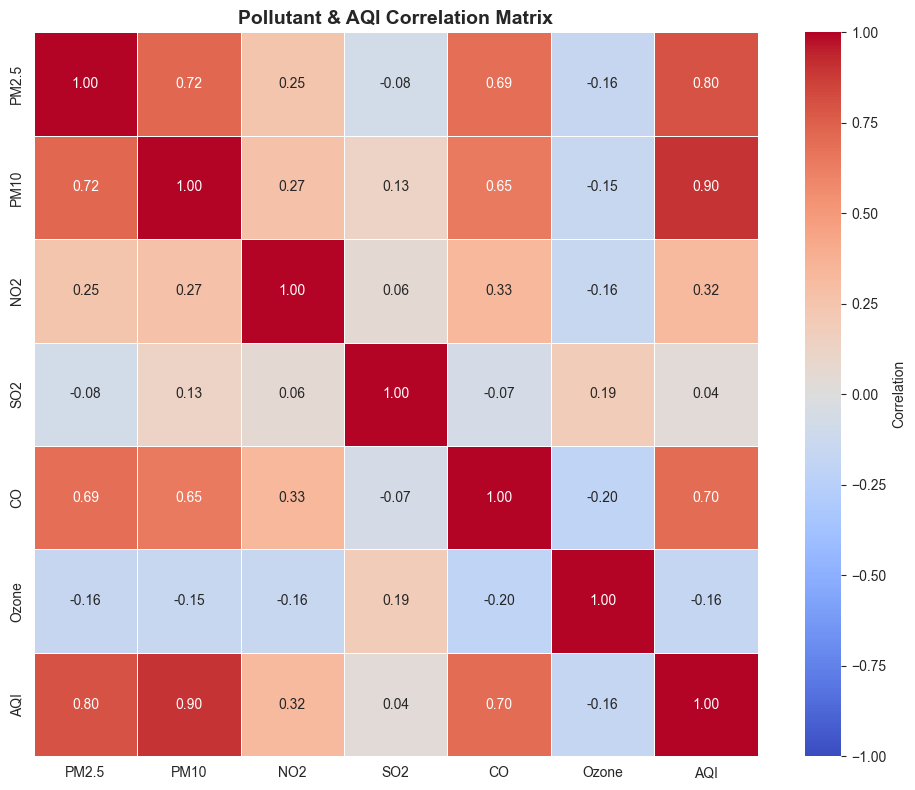

In [9]:
# Heatmap
fig, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm',
            center=0,
            cbar_kws={'label': 'Correlation'},
            vmin=-1, vmax=1,
            square=True,
            linewidths=0.5,
            ax=ax)

ax.set_title('Pollutant & AQI Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 🔍 Normality Testing

In [10]:
print("="*60)
print("NORMALITY TESTS (Shapiro-Wilk)")
print("="*60)
print(f"{'Variable':10} | {'Statistic':12} | {'P-value':12} | {'Normal?':10}")
print("-"*60)

for col in POLLUTANTS + ['AQI']:
    stat, p_value = stats.shapiro(df[col].dropna()[:5000])
    normal = "✓ Yes" if p_value > 0.05 else "✗ No"
    print(f"{col:10} | {stat:12.4f} | {p_value:12.2e} | {normal:10}")

print("\n* p > 0.05 suggests data is normally distributed")

NORMALITY TESTS (Shapiro-Wilk)
Variable   | Statistic    | P-value      | Normal?   
------------------------------------------------------------
PM2.5      |       0.7961 |     2.20e-39 | ✗ No      
PM10       |       0.9438 |     3.91e-23 | ✗ No      
NO2        |       0.6613 |     5.05e-47 | ✗ No      
SO2        |       0.8492 |     3.56e-35 | ✗ No      
CO         |       0.8346 |     1.95e-36 | ✗ No      
Ozone      |       0.9370 |     2.15e-24 | ✗ No      
AQI        |       0.9596 |     1.04e-19 | ✗ No      

* p > 0.05 suggests data is normally distributed


In [11]:
## 🎯 Q-Q Plots for Normality Assessment

IndexError: index 6 is out of bounds for axis 0 with size 6

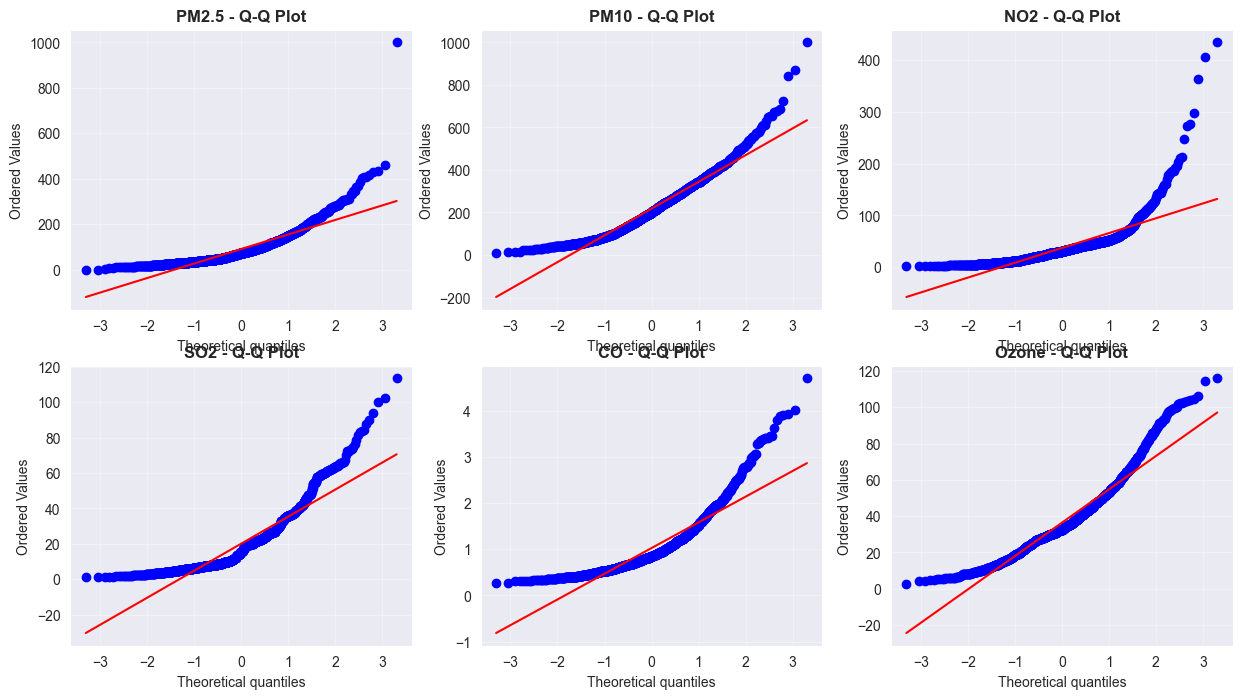

In [12]:
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for idx, col in enumerate(POLLUTANTS + ['AQI']):
    stats.probplot(df[col].dropna(), dist='norm', plot=axes[idx])
    axes[idx].set_title(f'{col} - Q-Q Plot', fontweight='bold')
    axes[idx].grid(alpha=0.3)

plt.suptitle('Normality Assessment - Q-Q Plots', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

In [ ]:
## 📆 Weekday vs Weekend Analysis (t-test)

In [ ]:
weekday_data = df[df['IsWeekend'] == 0]
weekend_data = df[df['IsWeekend'] == 1]

print("="*60)
print("WEEKDAY vs WEEKEND ANALYSIS (t-test)")
print("="*60)

t_stat, p_value = ttest_ind(weekday_data['AQI'].dropna(), weekend_data['AQI'].dropna())

print(f"\nAQI Comparison:")
print(f"  Weekday  - Mean: {weekday_data['AQI'].mean():.2f} | Std: {weekday_data['AQI'].std():.2f}")
print(f"  Weekend  - Mean: {weekend_data['AQI'].mean():.2f} | Std: {weekend_data['AQI'].std():.2f}")
print(f"\n  t-statistic: {t_stat:.4f}")
print(f"  p-value: {p_value:.2e}")
print(f"  Significant: {'✓ Yes (p < 0.05)' if p_value < 0.05 else '✗ No'}")

In [ ]:
## 📊 ANOVA - Seasonal Differences

In [ ]:
winter = df[df['Season'] == 'Winter']['AQI'].dropna()
summer = df[df['Season'] == 'Summer']['AQI'].dropna()
monsoon = df[df['Season'] == 'Monsoon']['AQI'].dropna()
autumn = df[df['Season'] == 'Autumn']['AQI'].dropna()

f_stat, p_value = f_oneway(winter, summer, monsoon, autumn)

print("="*60)
print("ONE-WAY ANOVA: AQI across SEASONS")
print("="*60)

print(f"\nSeasonal AQI Statistics:")
seasons_data = {'Winter': winter, 'Summer': summer, 'Monsoon': monsoon, 'Autumn': autumn}

for season, data in seasons_data.items():
    print(f"{season:10} - Mean: {data.mean():7.2f} | Median: {data.median():7.2f} | Std: {data.std():7.2f}")

print(f"\nANOVA Results:")
print(f"  F-statistic: {f_stat:.4f}")
print(f"  P-value: {p_value:.2e}")
print(f"  Significant: {'✓ Yes (p < 0.05)' if p_value < 0.05 else '✗ No'}")

In [ ]:
## 💡 Summary & Conclusions

In [ ]:
print("="*70)
print("STATISTICAL ANALYSIS SUMMARY")
print("="*70)

print("\n📊 KEY FINDINGS:")

# Correlations
aqi_corr = df[POLLUTANTS].corrwith(df['AQI']).sort_values(ascending=False)
print(f"\n1. CORRELATIONS:")
print(f"   - Strongest: {aqi_corr.idxmax()} (r = {aqi_corr.max():.3f})")
print(f"   - All correlations are statistically significant (p < 0.05)")

# Normality
print(f"\n2. DISTRIBUTION:")
print(f"   - Most variables are NOT normally distributed")
print(f"   - Non-parametric tests are more appropriate")

# Seasonal
if p_value < 0.05:
    print(f"\n3. SEASONAL DIFFERENCES:")
    worst_season = df.groupby('Season')['AQI'].mean().idxmax()
    best_season = df.groupby('Season')['AQI'].mean().idxmin()
    print(f"   - Significant seasonal differences found (p < 0.05)")
    print(f"   - Worst: {worst_season}")
    print(f"   - Best: {best_season}")

print("\n" + "="*70)